In [233]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, ElasticNet, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)


In [234]:
# Download and import the fuel efficiency dataset

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [235]:
# Copy and view the dataset

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [236]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [237]:
dataset = dataset.dropna()
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [238]:
print(dataset.dtypes)
dataset['Horsepower'] = dataset['Horsepower'].astype(int)
dataset['Displacement'] = dataset['Displacement'].astype(int)
dataset['Weight'] = dataset['Weight'].astype(int)
dataset['Acceleration'] = dataset['Acceleration'].astype(int)
dataset['MPG'] = dataset['MPG'].astype(int)
print(dataset.dtypes)

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
dtype: object
MPG             int32
Cylinders       int64
Displacement    int32
Horsepower      int32
Weight          int32
Acceleration    int32
Model Year      int64
Origin          int64
dtype: object


In [239]:
# Let's see the statistics and differences of each feature:
dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.283163,7.745896
Cylinders,5.471939,1.705783
Displacement,194.410714,104.645191
Horsepower,104.469388,38.491160
Weight,2977.584184,849.402560
Acceleration,15.186224,2.743700
Model Year,75.979592,3.683737
Origin,1.576531,0.805518


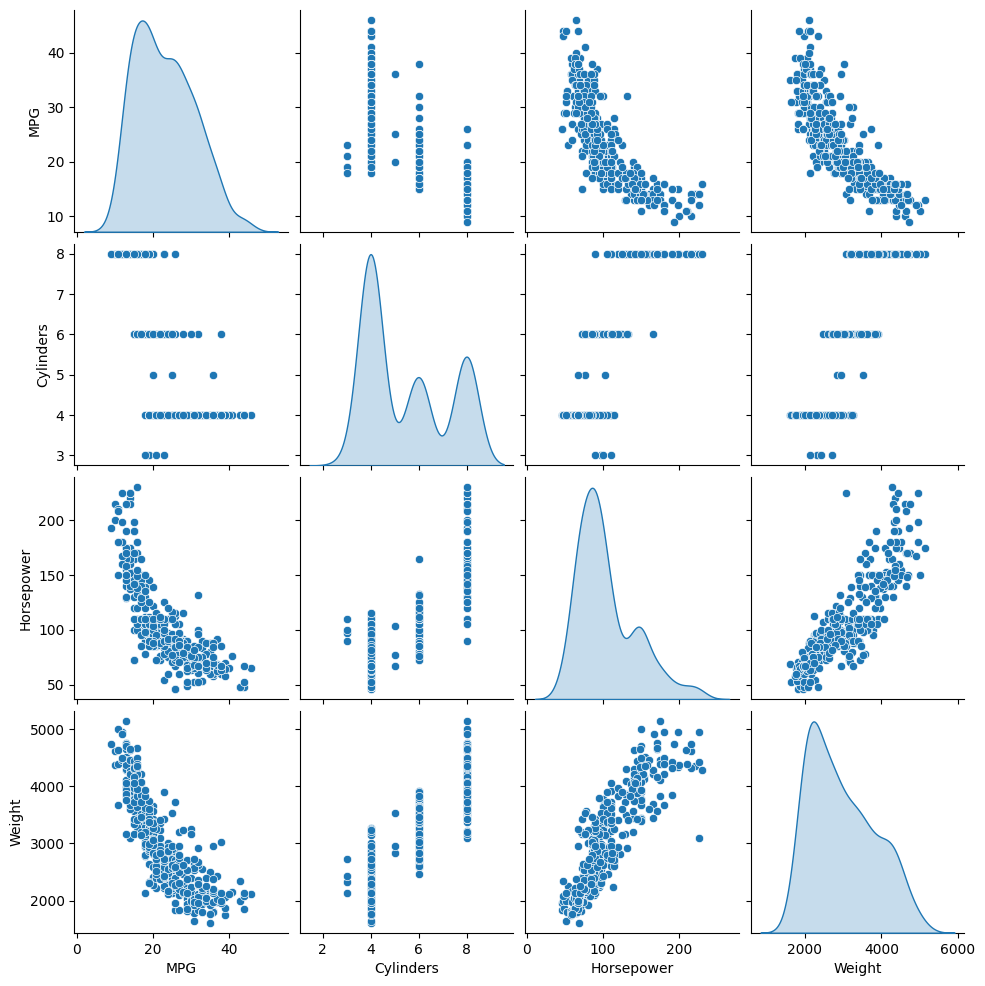

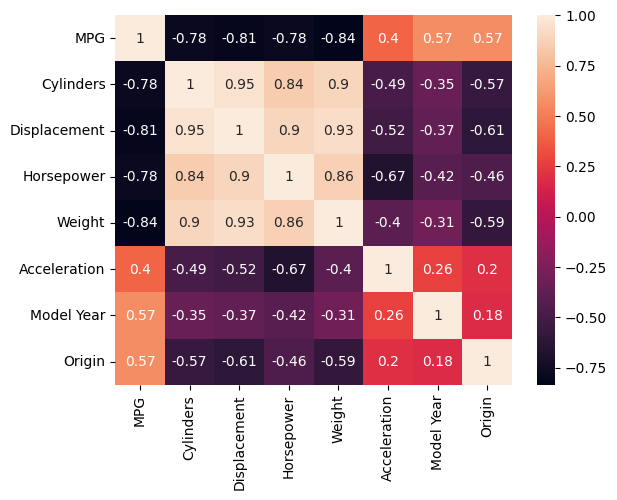

In [240]:
# Inspecting the generated data
sns.pairplot(dataset[['MPG', 'Cylinders', 'Horsepower', 'Weight']], diag_kind='kde')
plt.show()

sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [241]:
dataset_dummies = pd.get_dummies(dataset).astype('float32')
dataset_dummies['Origin'] = dataset_dummies['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset_dummies = pd.get_dummies(dataset_dummies, columns=['Origin'], prefix='', prefix_sep='')
dataset_dummies.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4.0,140.0,86.0,2790.0,15.0,82.0,False,False,True
394,44.0,4.0,97.0,52.0,2130.0,24.0,82.0,True,False,False
395,32.0,4.0,135.0,84.0,2295.0,11.0,82.0,False,False,True
396,28.0,4.0,120.0,79.0,2625.0,18.0,82.0,False,False,True
397,31.0,4.0,119.0,82.0,2720.0,19.0,82.0,False,False,True


In [242]:
# Separating  target variable from the features of the dataset
# The MPG column represents "Miles per Gallon", so if we want to predict the efficiency,
# this is the variable that we want to look at.

X = dataset_dummies.drop("MPG", axis = 1).values
y = dataset_dummies["MPG"].values

In [243]:
# Splitting the dataset into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

x_train=np.arange(0,len(X_train),1)
y_test = y_test.reshape(-1, 1)

print(type(X_train), type(y_train))
#print(X_train)
#print(X_train.shape)
#print(y_train)
#print(y_train.shape)
#print(X_test)
#print(X_test.shape)
#print(y_test)
#print(y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


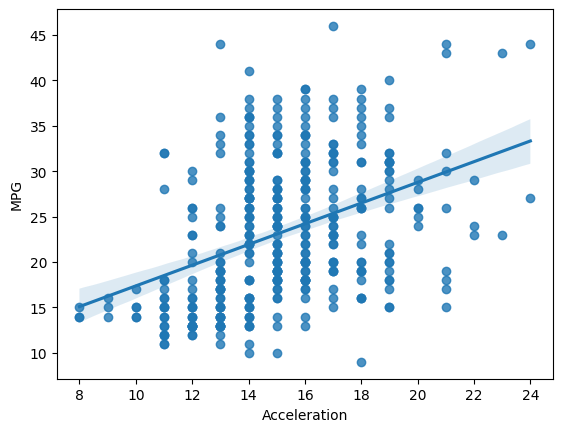

In [244]:
sns.regplot(x="Acceleration", y="MPG", data=dataset_dummies)
plt.show()

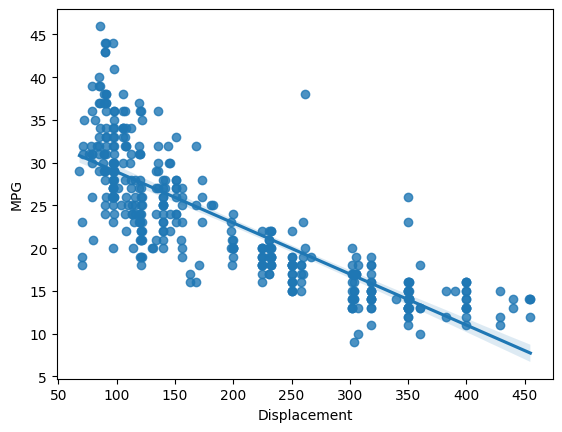

In [245]:
sns.regplot(x="Displacement", y="MPG", data=dataset_dummies)
plt.show()

Fitting Regression Models using all feature variables

In [246]:
# Instantiation of Model types

lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor()
elasticnet_reg = ElasticNet()
ridge_reg = Ridge()
bayes_ridge_reg = BayesianRidge()

In [247]:
# Fitting models

lin_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)
elasticnet_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
bayes_ridge_reg.fit(X_train, y_train)

lin_predictions = lin_reg.predict(X_test)
tree_predictions = tree_reg.predict(X_test)
elasticnet_predictions = elasticnet_reg.predict(X_test)
ridge_predictions = ridge_reg.predict(X_test)
bayes_ridge_predictions = bayes_ridge_reg.predict(X_test)

# Inspect Prediction Vectors

# print(tree_predictions)
# print(tree_predictions.shape)

In [248]:
# Mean Squared Error

lin_mse = print(mean_squared_error(y_test, lin_predictions))
tree_mse = print(mean_squared_error(y_test, tree_predictions))
elasticnet_mse = print(mean_squared_error(y_test, elasticnet_predictions))
ridge_mse = print(mean_squared_error(y_test, ridge_predictions))
bayes_ridge_mse = print(mean_squared_error(y_test, bayes_ridge_predictions))

10.417390976212875
10.94915254237288
10.55050755717654
10.38425111074599
10.088784771201343


In [249]:
# Root Mean Squared Error

lin_mse = print(root_mean_squared_error(y_test, lin_predictions))
tree_mse = print(root_mean_squared_error(y_test, tree_predictions))
elasticnet_mse = print(root_mean_squared_error(y_test, elasticnet_predictions))
ridge_mse = print(root_mean_squared_error(y_test, ridge_predictions))
bayes_ridge_mse = print(root_mean_squared_error(y_test, bayes_ridge_predictions))

3.2275983294413937
3.30895036867779
3.248154484807725
3.2224604125956287
3.1762847434072


In [250]:


lin_var = print(lin_reg.score(X_test, y_test))
tree_var = print(tree_reg.score(X_test, y_test))
elasticnet_var = print(elasticnet_reg.score(X_test, y_test))
ridge_var = print(ridge_reg.score(X_test, y_test))
bayes_ridge_var  = print(bayes_ridge_reg.score(X_test, y_test))

0.8013199285310708
0.7911781928306116
0.7987811343281892
0.8019519707434123
0.8075870931643175


In [251]:
# Cross-Validation

kf = KFold(n_splits = 7, shuffle = True, random_state=42)

In [252]:
lin_reg_score = print(cross_val_score(lin_reg, X, y, cv=kf))
tree_reg_score = print(cross_val_score(tree_reg, X, y, cv=kf))
elasticnet_reg_score = print(cross_val_score(elasticnet_reg, X, y, cv=kf))
ridge_reg_score = print(cross_val_score(ridge_reg, X, y, cv=kf))
bayes_ridge_reg_score = print(cross_val_score(bayes_ridge_reg, X, y, cv=kf))

[0.852 0.749 0.806 0.773 0.788 0.815 0.833]
[0.802 0.578 0.802 0.684 0.831 0.764 0.755]
[0.837 0.775 0.765 0.742 0.763 0.82  0.845]
[0.852 0.75  0.806 0.773 0.787 0.815 0.834]
[0.852 0.761 0.793 0.767 0.782 0.818 0.84 ]


Pipelined Cross-Validation using Scalers

In [253]:
lin_steps = [('scaler', StandardScaler()),
         ('lin', lin_reg)]

tree_steps = [('scaler', StandardScaler()),
         ('tree', tree_reg)]

elasticnet_steps = [('scaler', StandardScaler()),
         ('elasticnet', elasticnet_reg)]

ridge_steps = [('scaler', StandardScaler()),
         ('ridge', ridge_reg)]

bayes_ridge_steps = [('scaler', StandardScaler()),
         ('bayes_ridge', bayes_ridge_reg)]

In [254]:
lin_pipe = Pipeline(lin_steps)
tree_pipe = Pipeline(tree_steps)
elasticnet_pipe = Pipeline(elasticnet_steps)
ridge_pipe = Pipeline(ridge_steps)
bayes_ridge_pipe = Pipeline(bayes_ridge_steps)

In [255]:
# Model Parameter Configuration
print(lin_reg.get_params())

tree_params = {"tree__criterion": ["squared_error"], #"friedman_mse", "absolute_error"],
               "tree__splitter" : ['best', 'random'],
               "tree__max_features" : ["sqrt", "log2"],
               "tree__ccp_alpha": np.linspace(0.01, 0.5, 100)}

elasticnet_params = {"elasticnet__alpha" : np.linspace(0.001, 0.5, 100),
                     #"elasticnet__l1_ratio" : np.linspace(0.3, 0.5, 10),
                     "elasticnet__max_iter": [5000]}

ridge_params = {"ridge__alpha": np.linspace(0.01, 0.5, 100),
                "ridge__max_iter": [5000],
                "ridge__solver" : ['saga'], #'cholesky', 'svd', 'sparse_cg', 'sag', , 'lsqr'], #'lbfgs'
}
bayes_ridge_params = {"bayes_ridge__alpha_1": np.linspace(0.0000001, 0.000001, 100),
                      #"bayes_ridge__alpha_2": np.linspace(0.0001, 0.01, 5),
                      #"bayes_ridge__lambda_1": np.linspace(0.0001, 0.01, 5),
                      #"bayes_ridge__lambda_2": np.linspace(0.0001, 0.01, 5),
                      "bayes_ridge__alpha_init" : [None],
                      "bayes_ridge__lambda_init" : [None]}


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [256]:
# Cross Validation
# neg_mean_squared_error
# neg_root_mean_squared_error
# r2
# explained_variance



lin_cv = GridSearchCV(lin_pipe, param_grid = {}, cv = kf,scoring= "r2")
tree_cv = GridSearchCV(tree_pipe, param_grid = tree_params, cv = kf, scoring= "r2")
elasticnet_cv = GridSearchCV(elasticnet_pipe, param_grid = elasticnet_params, cv = kf, scoring= "r2")
ridge_cv = GridSearchCV(ridge_pipe, param_grid = ridge_params, cv = kf, scoring= "r2")
bayes_ridge_cv = GridSearchCV(bayes_ridge_pipe, param_grid = bayes_ridge_params, cv = kf, scoring= "r2")


In [257]:
lin_cv.fit(X_train, y_train)
tree_cv.fit(X_train, y_train)
elasticnet_cv.fit(X_train, y_train)
ridge_cv.fit(X_train, y_train)
bayes_ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=7, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('bayes_ridge', BayesianRidge())]),
             param_grid={'bayes_ridge__alpha_1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
                         'bayes_ridge__alpha_init': [None],
                         'bayes_ridge__lambda_init': [None]},
             scoring='r2')

In [258]:
print("Linear Regression")
lin_cv_predictions = print(lin_cv.predict(X_test))

print("Decision Tree Regression")
tree_cv_predictions = print(tree_cv.predict(X_test))

print("ElasticNET Regression")
elasticnet_cv_predictions = elasticnet_cv.predict(X_test)

print("Ridge Regression")
ridge_cv_predictions = print(ridge_cv.predict(X_test))

print("Bayes Ridge Regression")
bayes_ridge_cv_predictions = print(bayes_ridge_cv.predict(X_test))

Linear Regression
[27.191 26.893 34.173 24.438 27.787 30.132  8.693 30.243 20.412 30.
 12.626 24.736 16.517 29.288 22.627 28.407 20.114 32.858 26.092 31.072
 18.798 35.702 35.    14.989 29.711 26.775 22.228 16.009 30.239 25.488
 13.348 23.308 20.44  31.413 12.556 35.711 10.563 23.847 11.231  6.609
 12.812 28.791 35.884 27.616 11.891  9.688 17.672 32.545 24.075 31.472
 11.915 26.087 22.784 34.591 27.872 17.657 20.168 22.598 23.886 25.629
  8.346 22.604 25.097 24.509 29.476 29.968 25.192 30.729 21.51  10.185
 22.545 13.047 26.297 27.359 23.917 23.574 14.075 14.76  25.376 20.01
 24.482 20.91  12.174 32.336 15.177 35.272 26.226 22.991 16.528 16.833
 24.927 27.897 32.184 28.602 20.85  19.104 21.633  9.941 29.194 19.127
  9.566 16.194 10.023 28.701 28.947 31.494 36.442 25.068 24.215 19.8
 35.87  33.725 23.536 22.478 34.03  30.611 19.443 22.389]
Decision Tree Regression
[27.625 22.846 33.4   30.    25.381 27.625 12.857 24.533 18.525 31.444
 14.61  22.846 18.    27.625 18.5   30.5   21.091 33.

In [259]:
lin_cv_score = lin_cv.score(X_test, y_test)
tree_cv_score = tree_cv.score(X_test, y_test)
elasticnet_cv_score = elasticnet_cv.score(X_test, y_test)
ridge_cv_score = ridge_cv.score(X_test, y_test)
bayes_ridge_cv_score  = bayes_ridge_cv.score(X_test, y_test)

In [260]:
print("Linear Regression")
print(lin_cv.best_score_)
print(lin_cv.best_params_)

print("Decision Tree Regression")
print(tree_cv.best_score_)
print(tree_cv.best_params_)

print("ElasticNET Regression")
print(elasticnet_cv.best_score_)
print(elasticnet_cv.best_params_)

print("Ridge Regression")
print(ridge_cv.best_score_)
print(ridge_cv.best_params_)

print("Bayes Ridge Regression")
print(bayes_ridge_cv.best_score_)
print(bayes_ridge_cv.best_params_)

Linear Regression
0.8026652655473372
{}
Decision Tree Regression
0.8281222167618132
{'tree__ccp_alpha': 0.11888888888888888, 'tree__criterion': 'squared_error', 'tree__max_features': 'sqrt', 'tree__splitter': 'best'}
ElasticNET Regression
0.8028782362752239
{'elasticnet__alpha': 0.0060404040404040404, 'elasticnet__max_iter': 5000}
Ridge Regression
0.8028145053557786
{'ridge__alpha': 0.5, 'ridge__max_iter': 5000, 'ridge__solver': 'saga'}
Bayes Ridge Regression
0.8023517704381465
{'bayes_ridge__alpha_1': 1e-06, 'bayes_ridge__alpha_init': None, 'bayes_ridge__lambda_init': None}


In [261]:
print("Test Data")
print(y_test.reshape(1, -1))

print("ElasticNET Predictions")
print(elasticnet_cv_predictions)

Test Data
[[26. 21. 36. 26. 27. 28. 13. 26. 19. 29. 15. 19. 16. 29. 16. 28. 20. 32.
  27. 35. 22. 44. 34. 18. 26. 26. 21. 16. 26. 22. 15. 19. 19. 31. 13. 38.
  14. 25. 13. 10. 13. 24. 36. 26. 14. 13. 19. 37. 21. 29. 14. 24. 28. 36.
  22. 16. 20. 20. 25. 25. 12. 22. 26. 23. 21. 25. 25. 29. 19. 15. 22. 13.
  22. 18. 17. 28. 15. 16. 27. 18. 25. 18. 15. 39. 15. 29. 25. 21. 17. 16.
  22. 30. 30. 31. 19. 16. 18. 13. 27. 18. 11. 17. 14. 26. 34. 34. 35. 20.
  22. 18. 32. 31. 21. 22. 37. 32. 19. 15.]]
ElasticNET Predictions
[27.172 26.93  34.079 24.473 27.82  30.129  8.683 30.236 20.443 29.981
 12.478 24.885 16.507 29.298 22.827 28.454 20.218 32.821 26.193 31.004
 18.876 35.501 34.931 15.018 29.718 26.8   22.316 16.136 30.102 25.456
 13.392 23.258 20.541 31.38  12.449 35.636 10.834 23.933 11.427  6.717
 12.959 28.794 35.725 27.655 12.001  9.52  17.656 32.518 24.029 31.424
 11.926 26.103 22.771 34.473 27.729 17.643 20.242 22.509 23.919 25.652
  8.178 22.538 25.203 24.589 29.433 29.87  25.24  30.

<Axes: xlabel='predictions', ylabel='scores'>

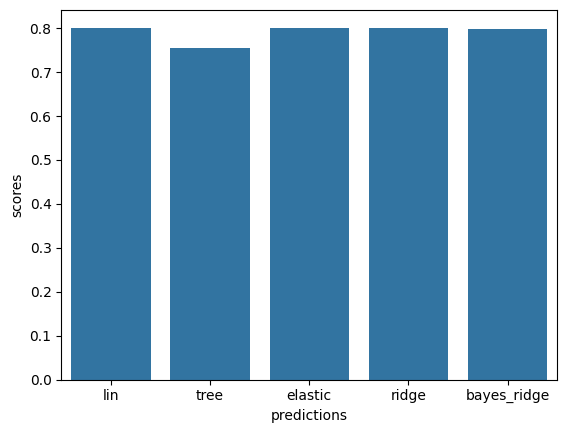

In [262]:
data = {
        "predictions" : ["lin", "tree", "elastic", "ridge", "bayes_ridge"],
        "scores" : [lin_cv_score, tree_cv_score, elasticnet_cv_score, ridge_cv_score, bayes_ridge_cv_score]
        }

sns.barplot(data=data, x="predictions", y="scores")